# Code for running SiameseNet and TripletNet on BRACOL Dataset

***The code used in this notebook is mostly from [this](https://github.com/adambielski/siamese-triplet/). If you are interested in it, check it out, it is extremely well documented***

***Install libs***

In [1]:
#!pip install learn2learn
#!pip install efficientnet_pytorch
#!pip install transformers
#pip install timm
from IPython.display import clear_output 
# clear_output()

print('Done!')

Done!


***Import some libs***

In [2]:
import sys
#sys.path.insert(0, '/content/drive/MyDrive/pg/siamese_triplet_net/src/')
#sys.path.insert(0,'C:/Users/Mey/Documents/pg-coffee-main/siamese_triplet_net/src/')
#sys.path.insert(0,'C:/Users/Mey/Documents/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/src/')
sys.path.insert(0,'f:/Meysam-Khodarahi/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/src/')
import torch
from transformers import ViTForImageClassification, ViTFeatureExtractor
from dataloaders import get_train_transforms, get_val_transforms, get_triplet_dataloader
from networks import TripletNet 
from models import MobileNetv2
from losses import TripletLoss
from trainer import fit
import torchvision

from IPython.display import clear_output 
 
import timm
 



***Define model hiperparams***

In [6]:
#from CustomViT import CustomViT
# model & optimizer & lr_scheduler

 
# مدل Siamese و ViT
embedding_net = MobileNetv2()
siamese_model = TripletNet(embedding_net=embedding_net)
#vit_model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')
#feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')


#embedding_net = ViTEmbeddingNet()
#model = TripletNet(embedding_net=embedding_net)

#model = CustomViT(num_classes=15)

#====این قسمت به صورت موقت برای لود امبدینگ مدل آموزش داده شده قبلی بر روی پلنت ویلج به کار میرود
#import torch
#model = torch.load("C:/Users/Mey/Documents/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/siamese_NFNet_15Shot.h5",map_location=torch.device('cpu'))
#model.load_state_dict(torch.load("C:/Users/Mey/Documents/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/siamese_NFNet_15Shot.h5",map_location=torch.device('cpu')) )
#Wmodel.eval()
#============================
optimizer = torch.optim.SGD(siamese_model.parameters(), lr=0.001, momentum=0.9)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5)
loss_fn = TripletLoss(1.)
n_epochs=100 #100
device = torch.cuda.is_available()
if device:
    siamese_model.cuda()
    #vit_model.cuda()

log_interval =10  # 100

# path to data
#path_data = '/content/drive/MyDrive/pg/dataset/'
#path_data='C:/Users/Mey/Documents/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/src/dataset'
path_data='f:/Meysam-Khodarahi/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/src/dataset'

# define siamese train and val loaders
# this loader is implemented for datasets in ImageFolder format (https://pytorch.org/vision/stable/datasets.html#imagefolder)
triplet_train_loader = get_triplet_dataloader(root=path_data + '/train/', batch_size=5, transforms=get_train_transforms())
triplet_val_loader = get_triplet_dataloader(root=path_data + '/val/', batch_size=5, transforms=get_val_transforms())

 

In [7]:
fit(triplet_train_loader, triplet_val_loader, siamese_model,  loss_fn, optimizer, lr_scheduler, n_epochs, device, log_interval)

Train: [0/225 (0%)]	Loss: 0.897825
Train: [50/225 (22%)]	Loss: 0.869251
Train: [100/225 (44%)]	Loss: 0.842404
Train: [150/225 (67%)]	Loss: 0.856024
Train: [200/225 (89%)]	Loss: 0.842586
Epoch: 1/100. Train set: Average loss: 0.8493
Epoch: 1/100. Validation set: Average loss: 0.7781
Estimated time of epoch: 26.46 s
ETA:44.1 min
Train: [0/225 (0%)]	Loss: 0.828067
Train: [50/225 (22%)]	Loss: 0.768097
Train: [100/225 (44%)]	Loss: 0.729509
Train: [150/225 (67%)]	Loss: 0.745842
Train: [200/225 (89%)]	Loss: 0.631441
Epoch: 2/100. Train set: Average loss: 0.7276
Epoch: 2/100. Validation set: Average loss: 0.6225
Estimated time of epoch: 25.95 s
ETA:42.82 min
Train: [0/225 (0%)]	Loss: 0.688051
Train: [50/225 (22%)]	Loss: 0.632423
Train: [100/225 (44%)]	Loss: 0.633822
Train: [150/225 (67%)]	Loss: 0.499346
Train: [200/225 (89%)]	Loss: 0.563200
Epoch: 3/100. Train set: Average loss: 0.5748
Epoch: 3/100. Validation set: Average loss: 0.5141
Estimated time of epoch: 25.96 s
ETA:42.4 min
Train: [0/22

Train: [50/225 (22%)]	Loss: 0.227222
Train: [100/225 (44%)]	Loss: 0.257657
Train: [150/225 (67%)]	Loss: 0.177096
Train: [200/225 (89%)]	Loss: 0.212525
Epoch: 26/100. Train set: Average loss: 0.2160
Epoch: 26/100. Validation set: Average loss: 0.2641
Estimated time of epoch: 25.68 s
ETA:32.1 min
Train: [0/225 (0%)]	Loss: 0.195152
Train: [50/225 (22%)]	Loss: 0.294135
Train: [100/225 (44%)]	Loss: 0.201012
Train: [150/225 (67%)]	Loss: 0.176307
Train: [200/225 (89%)]	Loss: 0.202591
Epoch: 27/100. Train set: Average loss: 0.2159
Epoch: 27/100. Validation set: Average loss: 0.2482
Estimated time of epoch: 25.72 s
ETA:31.72 min
Train: [0/225 (0%)]	Loss: 0.068774
Train: [50/225 (22%)]	Loss: 0.080794
Train: [100/225 (44%)]	Loss: 0.205934
Train: [150/225 (67%)]	Loss: 0.145936
Train: [200/225 (89%)]	Loss: 0.349891
Epoch: 28/100. Train set: Average loss: 0.1948
Epoch: 28/100. Validation set: Average loss: 0.2507
Estimated time of epoch: 25.83 s
ETA:31.43 min
Train: [0/225 (0%)]	Loss: 0.354460
Train

Train: [50/225 (22%)]	Loss: 0.157842
Train: [100/225 (44%)]	Loss: 0.167440
Train: [150/225 (67%)]	Loss: 0.184359
Train: [200/225 (89%)]	Loss: 0.110261
Epoch: 51/100. Train set: Average loss: 0.1450
Epoch: 51/100. Validation set: Average loss: 0.2407
Estimated time of epoch: 25.6 s
ETA:21.33 min
Train: [0/225 (0%)]	Loss: 0.083148
Train: [50/225 (22%)]	Loss: 0.188078
Train: [100/225 (44%)]	Loss: 0.224293
Train: [150/225 (67%)]	Loss: 0.306229
Train: [200/225 (89%)]	Loss: 0.188227
Epoch: 52/100. Train set: Average loss: 0.2190
Epoch: 52/100. Validation set: Average loss: 0.2344
Estimated time of epoch: 26.04 s
ETA:21.27 min
Train: [0/225 (0%)]	Loss: 0.000000
Train: [50/225 (22%)]	Loss: 0.226203
Train: [100/225 (44%)]	Loss: 0.210560
Train: [150/225 (67%)]	Loss: 0.153051
Train: [200/225 (89%)]	Loss: 0.165391
Epoch: 53/100. Train set: Average loss: 0.1892
Epoch: 53/100. Validation set: Average loss: 0.2199
Estimated time of epoch: 25.81 s
ETA:20.65 min
Train: [0/225 (0%)]	Loss: 0.154394
Train

Train: [50/225 (22%)]	Loss: 0.215820
Train: [100/225 (44%)]	Loss: 0.226181
Train: [150/225 (67%)]	Loss: 0.159581
Train: [200/225 (89%)]	Loss: 0.160678
Epoch: 76/100. Train set: Average loss: 0.1924
Epoch: 76/100. Validation set: Average loss: 0.2337
Estimated time of epoch: 25.48 s
ETA:10.62 min
Train: [0/225 (0%)]	Loss: 0.055610
Train: [50/225 (22%)]	Loss: 0.125920
Train: [100/225 (44%)]	Loss: 0.206742
Train: [150/225 (67%)]	Loss: 0.209988
Train: [200/225 (89%)]	Loss: 0.157273
Epoch: 77/100. Train set: Average loss: 0.1783
Epoch: 77/100. Validation set: Average loss: 0.2227
Estimated time of epoch: 25.61 s
ETA:10.24 min
Train: [0/225 (0%)]	Loss: 0.169099
Train: [50/225 (22%)]	Loss: 0.190027
Train: [100/225 (44%)]	Loss: 0.211088
Train: [150/225 (67%)]	Loss: 0.218376
Train: [200/225 (89%)]	Loss: 0.141991
Epoch: 78/100. Train set: Average loss: 0.1841
Epoch: 78/100. Validation set: Average loss: 0.2330
Estimated time of epoch: 25.62 s
ETA:9.82 min
Train: [0/225 (0%)]	Loss: 0.202866
Train

In [8]:
# from: https://github.com/avilash/pytorch-siamese-triplet/blob/master/tsne.py
import cv2
import numpy as np
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm import tqdm
from torchvision import transforms
from torch.autograd import Variable
import os
import pandas as pd
import seaborn as sns
# استخراج ویژگی‌ها با استفاده از مدل Siamese
#def generate_embeddings(data_loader, model):
#    with torch.no_grad():
#        #device = 'cuda'
#        model.eval()
#        #model.to(device)
#        labels = None
#        embeddings = None
#        for batch_idx, data in tqdm(enumerate(data_loader)):
#            batch_imgs, batch_labels = data
#            batch_labels = batch_labels.numpy()
#           # batch_imgs = Variable(batch_imgs.to('cuda'))
#            batch_E = model.get_embedding(batch_imgs)
#            batch_E = batch_E.data.cpu().numpy()
#            embeddings = np.concatenate((embeddings, batch_E), axis=0) if embeddings is not None else batch_E
#            labels = np.concatenate((labels, batch_labels), axis=0) if labels is not None else batch_labels
#    return embeddings, labels
def generate_embeddings(data_loader, model):
    with torch.no_grad():
        #device = 'cuda'
        model.eval()
        #model.to(device)
        embeddings = []
        labels = []
        for batch_imgs, batch_labels in data_loader:
            if device:
                batch_imgs = batch_imgs.cuda()
            batch_E = model.get_embedding(batch_imgs)
            embeddings.append(batch_E.cpu().numpy())
            labels.append(batch_labels.numpy())
    return np.concatenate(embeddings), np.concatenate(labels)

def vis_tSNE(embeddings, labels, backbone='Convnet'):
    num_samples = embeddings.shape[0]
    X_embedded = TSNE(n_components=2).fit_transform(embeddings[0:num_samples, :])
    plt.figure(figsize=(16, 16))
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd','#1fa7b4', '#fb7f0e', '#27a02c', '#da2758', '#a46abd','#af7bb4', '#fa7fbe', '#2baf2c', '#4f2d28', '#b4f7bd']
    labels_name = ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight','Tomato__Target_Spot','Tomato__Tomato_mosaic_virus','Tomato__Tomato_YellowLeaf__Curl_Virus','Tomato_Bacterial_spot','Tomato_Early_blight','Tomato_healthy','Tomato_Late_blight','Tomato_Leaf_Mold','Tomato_Septoria_leaf_spot','Tomato_Spider_mites_Two_spotted_spider_mite']
    for i in range(16):
        inds = np.where(labels==i)[0]
        plt.scatter(X_embedded[inds,0], X_embedded[inds,1], alpha=.8, color=colors[i], s=200)
    # plt.title(f't-SNE', fontweight='bold', fontsize=24)
    plt.legend(labels_name, fontsize=30)
    plt.savefig(f'./tsne_{backbone}.png')



In [9]:
import torch
#torch.save(siamese_model, "C:/Users/Mey/Documents/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/siamese_Mobilenet_15ShotVit4.h5" )
torch.save(siamese_model, "f:/Meysam-Khodarahi/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/siameseNFnet15shottovit4.h5" )

#siamese_model = torch.load("f:/Meysam-Khodarahi/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/siameseNFnet15shottovit4.h5",map_location=torch.device('cuda'))
#siamese_model.eval()
#===قسمت زیر به صورت موقت غیر فعال شد آنرا برگردانیم
#model = torch.load("C:/Users/Mey/Documents/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/siamese.h5",map_location=torch.device('cpu'))
#model.eval()
#======
#path_data='C:/Users/Mey/Documents/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/src/dataset'
path_data='f:/Meysam-Khodarahi/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/src/dataset'

IndexError: list index out of range

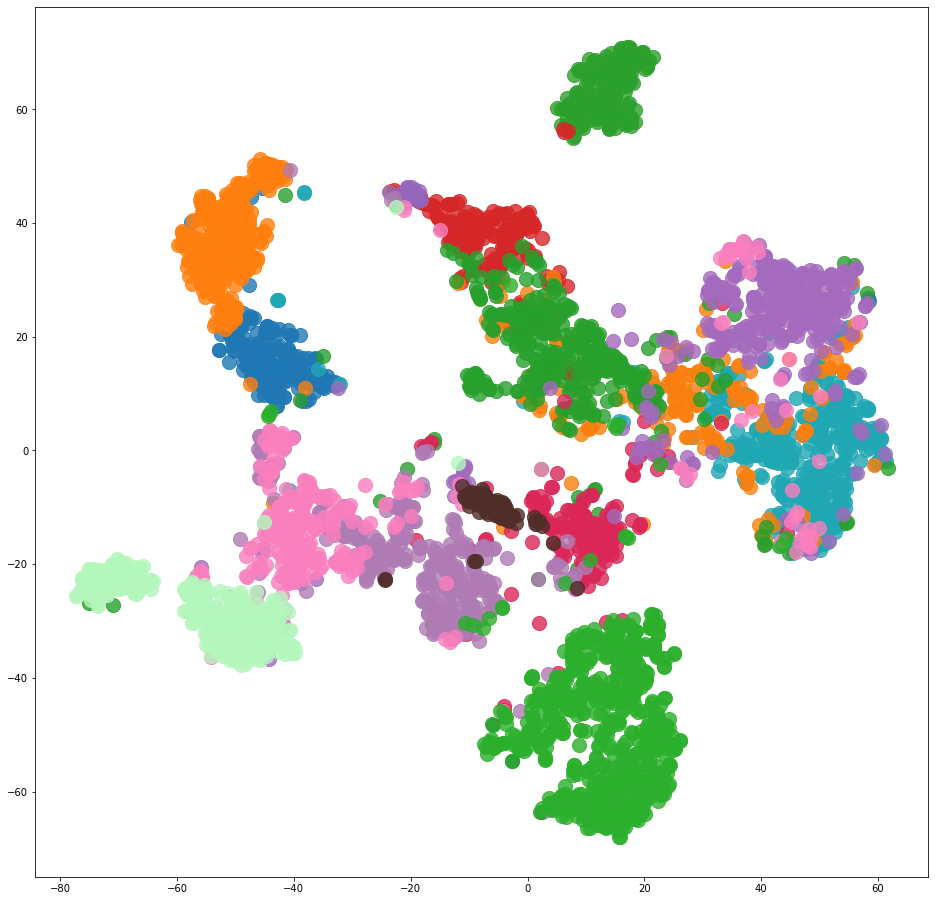

In [10]:
test_data = torchvision.datasets.ImageFolder(root=path_data + '/test/', transform=get_val_transforms())
test_loader = torch.utils.data.DataLoader(test_data, batch_size=1)

val_embeddings_cl, val_labels_cl = generate_embeddings(test_loader, siamese_model)
vis_tSNE(val_embeddings_cl, val_labels_cl)

In [35]:
train_data = torchvision.datasets.ImageFolder(root=path_data + '/train/', transform=get_val_transforms())
train_loader = torch.utils.data.DataLoader(train_data, batch_size=32)

test_data = torchvision.datasets.ImageFolder(root=path_data + '/test/', transform=get_val_transforms())
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32)
 
# استخراج ویژگی‌ها از داده‌های آموزش
train_embeddings, train_labels = generate_embeddings(train_loader, siamese_model )
# استخراج ویژگی‌ها از داده‌های تست
test_embeddings, test_labels = generate_embeddings(test_loader, siamese_model )
 




In [37]:
import torch
import torch.nn as nn
from torchvision import transforms
from sklearn.metrics import accuracy_score, f1_score , precision_score , recall_score
from transformers import ViTForImageClassification, ViTConfig

# فرض کنید که embedding های شما به صورت tensor با ابعاد [batch_size, embedding_dim] است
# همچنین فرض می‌کنیم که تعداد کلاس‌ها مشخص است
num_classes = 15  # تعداد کلاس‌ها 

# 1. بارگذاری مدل ViT با حذف لایه‌های ابتدایی
class CustomViT(nn.Module):
    def __init__(self, original_vit_model, embedding_dim, num_classes):
        super(CustomViT, self).__init__()
        # حذف لایه‌های ابتدایی
        self.vit = nn.Sequential(*list(original_vit_model.children())[2:])  # لایه‌های ابتدایی حذف شده
        #self.fc = nn.Linear(embedding_dim, num_classes)  # لایه نهایی برای طبقه‌بندی
        self.fc = nn.Linear(1280, num_classes)  # لایه نهایی برای طبقه‌بندی

    def forward(self, x):
        x = self.vit(x)
        x = self.fc(x)
        return x

# 2. بارگذاری مدل ViT از Hugging Face
vit_model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')#, num_labels=num_classes)#, ignore_mismatched_sizes=True)
 

vit_model.classifier = torch.nn.Linear(vit_model.config.hidden_size, num_classes)



embedding_dim = vit_model.config.hidden_size  # ابعاد embedding
model = CustomViT(vit_model, embedding_dim, num_classes)
print("embedding_dim:")
print(embedding_dim)
# 3. فرض کنیم داده‌های شما به شکل X_train (embedding) و y_train (برچسب‌ها) است
# و همچنین داده‌های اعتبارسنجی X_val و y_val
#X_train, y_train = torch.randn(64, embedding_dim), torch.randint(0, num_classes, (64,))
#X_val, y_val = torch.randn(32, embedding_dim), torch.randint(0, num_classes, (32,))
X_train, y_train =train_embeddings, train_labels
X_val, y_val =test_embeddings, test_labels

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)

# 4. آموزش مدل
device = 'cuda' if torch.cuda.is_available() else 'cpu'
#device = torch.cuda.is_available()
if  torch.cuda.is_available():
    model.cuda()
#model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# آموزش
model.train()
for epoch in range(1000):  # تعداد epochs
    optimizer.zero_grad()
    outputs = model(X_train_tensor.to(device))
    #outputs = model(X_train_tensor )
    loss = criterion(outputs, y_train_tensor.to(device))
    #loss = criterion(outputs, y_train_tensor )
    loss.backward()
    optimizer.step()
    print(f'Epoch [{epoch+1}/10], Loss: {loss.item():.4f}')

# 5. ارزیابی مدل
model.eval()
with torch.no_grad():
    val_outputs = model(X_val_tensor.to(device))
    #val_outputs = model(X_val_tensor)
    _, predicted = torch.max(val_outputs.data, 1)

# محاسبه دقت و امتیاز F1
accuracy = accuracy_score(y_val_tensor.cpu(), predicted.cpu())
#accuracy = accuracy_score(y_val_tensor, predicted )
f1 = f1_score(y_val_tensor.cpu(), predicted.cpu(), average='weighted')
#f1 = f1_score(y_val_tensor, predicted , average='weighted')
print(f'Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}')

 
precision =  precision_score(y_val_tensor.cpu(), predicted.cpu() , average='macro') 
recall =  recall_score(y_val_tensor.cpu(),  predicted.cpu() , average='macro') 
 
print(f'--- Results for MobileNetv2 Embeddings on KNN (k = 1) ---')
print(f'Accuracy Score:{accuracy}')
print(f'Precision Score: {precision}')
print(f'Recall Score: {recall}')
print(f'F1 Score: {f1}')

embedding_dim:
768
Epoch [1/10], Loss: 2.7078
Epoch [2/10], Loss: 2.7056
Epoch [3/10], Loss: 2.7033
Epoch [4/10], Loss: 2.7011
Epoch [5/10], Loss: 2.6988
Epoch [6/10], Loss: 2.6966
Epoch [7/10], Loss: 2.6943
Epoch [8/10], Loss: 2.6920
Epoch [9/10], Loss: 2.6898
Epoch [10/10], Loss: 2.6875
Epoch [11/10], Loss: 2.6853
Epoch [12/10], Loss: 2.6830
Epoch [13/10], Loss: 2.6808
Epoch [14/10], Loss: 2.6785
Epoch [15/10], Loss: 2.6763
Epoch [16/10], Loss: 2.6741
Epoch [17/10], Loss: 2.6718
Epoch [18/10], Loss: 2.6696
Epoch [19/10], Loss: 2.6673
Epoch [20/10], Loss: 2.6651
Epoch [21/10], Loss: 2.6629
Epoch [22/10], Loss: 2.6606
Epoch [23/10], Loss: 2.6584
Epoch [24/10], Loss: 2.6562
Epoch [25/10], Loss: 2.6539
Epoch [26/10], Loss: 2.6517
Epoch [27/10], Loss: 2.6495
Epoch [28/10], Loss: 2.6473
Epoch [29/10], Loss: 2.6450
Epoch [30/10], Loss: 2.6428
Epoch [31/10], Loss: 2.6406
Epoch [32/10], Loss: 2.6384
Epoch [33/10], Loss: 2.6361
Epoch [34/10], Loss: 2.6339
Epoch [35/10], Loss: 2.6317
Epoch [36/

Epoch [375/10], Loss: 1.9708
Epoch [376/10], Loss: 1.9692
Epoch [377/10], Loss: 1.9675
Epoch [378/10], Loss: 1.9658
Epoch [379/10], Loss: 1.9641
Epoch [380/10], Loss: 1.9625
Epoch [381/10], Loss: 1.9608
Epoch [382/10], Loss: 1.9591
Epoch [383/10], Loss: 1.9575
Epoch [384/10], Loss: 1.9558
Epoch [385/10], Loss: 1.9541
Epoch [386/10], Loss: 1.9525
Epoch [387/10], Loss: 1.9508
Epoch [388/10], Loss: 1.9492
Epoch [389/10], Loss: 1.9475
Epoch [390/10], Loss: 1.9459
Epoch [391/10], Loss: 1.9442
Epoch [392/10], Loss: 1.9425
Epoch [393/10], Loss: 1.9409
Epoch [394/10], Loss: 1.9392
Epoch [395/10], Loss: 1.9376
Epoch [396/10], Loss: 1.9359
Epoch [397/10], Loss: 1.9343
Epoch [398/10], Loss: 1.9327
Epoch [399/10], Loss: 1.9310
Epoch [400/10], Loss: 1.9294
Epoch [401/10], Loss: 1.9277
Epoch [402/10], Loss: 1.9261
Epoch [403/10], Loss: 1.9245
Epoch [404/10], Loss: 1.9228
Epoch [405/10], Loss: 1.9212
Epoch [406/10], Loss: 1.9196
Epoch [407/10], Loss: 1.9179
Epoch [408/10], Loss: 1.9163
Epoch [409/10]

Epoch [787/10], Loss: 1.3995
Epoch [788/10], Loss: 1.3984
Epoch [789/10], Loss: 1.3973
Epoch [790/10], Loss: 1.3962
Epoch [791/10], Loss: 1.3951
Epoch [792/10], Loss: 1.3939
Epoch [793/10], Loss: 1.3928
Epoch [794/10], Loss: 1.3917
Epoch [795/10], Loss: 1.3906
Epoch [796/10], Loss: 1.3895
Epoch [797/10], Loss: 1.3884
Epoch [798/10], Loss: 1.3873
Epoch [799/10], Loss: 1.3862
Epoch [800/10], Loss: 1.3851
Epoch [801/10], Loss: 1.3840
Epoch [802/10], Loss: 1.3829
Epoch [803/10], Loss: 1.3818
Epoch [804/10], Loss: 1.3807
Epoch [805/10], Loss: 1.3795
Epoch [806/10], Loss: 1.3784
Epoch [807/10], Loss: 1.3774
Epoch [808/10], Loss: 1.3763
Epoch [809/10], Loss: 1.3752
Epoch [810/10], Loss: 1.3741
Epoch [811/10], Loss: 1.3730
Epoch [812/10], Loss: 1.3719
Epoch [813/10], Loss: 1.3708
Epoch [814/10], Loss: 1.3697
Epoch [815/10], Loss: 1.3686
Epoch [816/10], Loss: 1.3675
Epoch [817/10], Loss: 1.3664
Epoch [818/10], Loss: 1.3653
Epoch [819/10], Loss: 1.3642
Epoch [820/10], Loss: 1.3632
Epoch [821/10]

In [25]:
!pip install  --upgrade transformers

    

  Using cached transformers-4.45.2-py3-none-any.whl (9.9 MB)
  Attempting uninstall: transformers
    Found existing installation: transformers 4.6.1
    Uninstalling transformers-4.6.1:
      Successfully uninstalled transformers-4.6.1


Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 131.5/131.5 kB 235.0 kB/s eta 0:00:00
     -------------------------------------- 43.2/43.2 kB 422.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 2.3/2.3 MB 450.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
